In [16]:
#importing the dependencies

In [1]:
import numpy as np
import pandas as pd   #for making the dataframe
import matplotlib.pyplot as plt #for making graphs
import sklearn.datasets  #for getting ML algos and other tools for preprocessing
import seaborn as sns #for plotting
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor
from sklearn import metrics



In [29]:
#loaded california data
#created dataframe & stored in a variable
#included target to include the price column
#ssee shape of the dataframe
#check whether dataframe has any missing values
#check statistical measures
#find correlation between variables through heatmaps
#splitting data sets into training and test data
#loading the model andd training 
#checking error values and they should be small
#visualise the predicted values along the error values & diff shud be quite small

In [3]:
#importing the california House Price Dataset
#ps the cali dataset is already provided by default


house_price_dataset =fetch_california_housing()

#house_price_dataframe =pd.read_csv('bostonData.csv')

print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
#loading the data into the dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [5]:
#print first 5 rows of our DataFrame
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
#add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset['target']


In [7]:
#print first 5 rows of our DataFrame to see if price was added
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
#checking the number of rows and columns in the data frame
house_price_dataframe.shape

(20640, 9)

In [22]:
#checking for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
#statistical measures of the datasets
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
#finding the correlation between the data
#positive correlation
#negative correlation

correlation = house_price_dataframe.corr()

<Axes: >

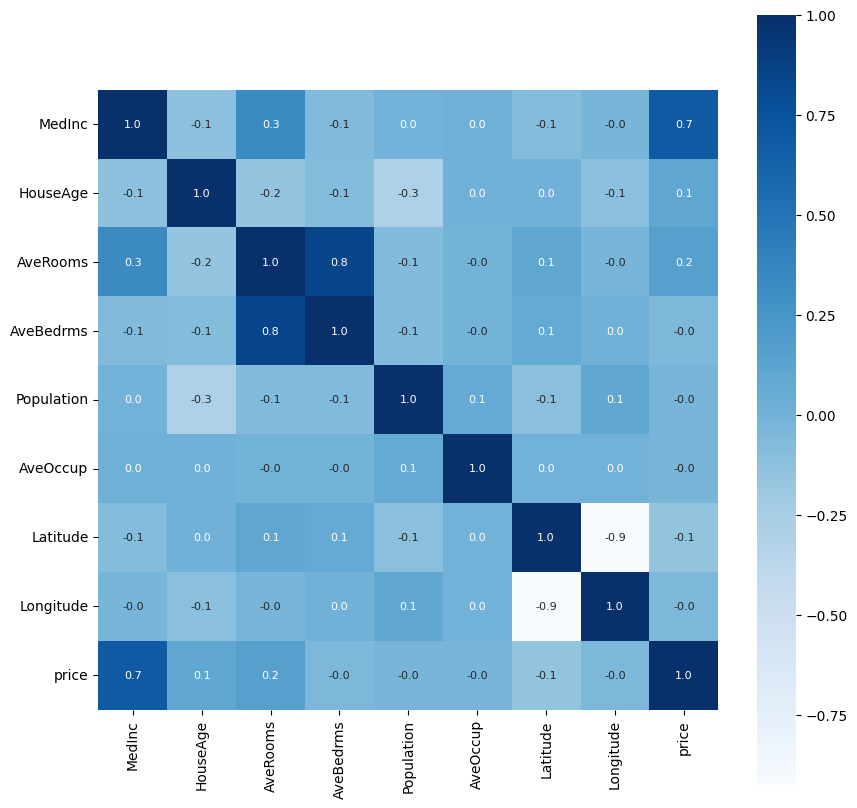

In [13]:
#constructing a heatmap to understand the correlation
plt.figure(figsize= (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
#This splitting is typically done to separate the input features (X) from the target variable (Y) so that 
#you can train a machine learning model to predict the target variable based on the 
#input features.
#splitting the data and target 
X = house_price_dataframe.drop(['price'], axis= 1)
Y = house_price_dataframe['price']

In [20]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [21]:
#splitting the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [24]:
#ML starts from here
#loading the model
model = XGBRegressor()

In [25]:
#training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
#prediction on training data
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [29]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [31]:
#r squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print("Mean absolute error : ", score_2)
#the errors should be very small like between 0.5 and 1

R squared error :  0.943650140819218
Mean absolute error :  0.1933648700612105


<function matplotlib.pyplot.show(close=None, block=None)>

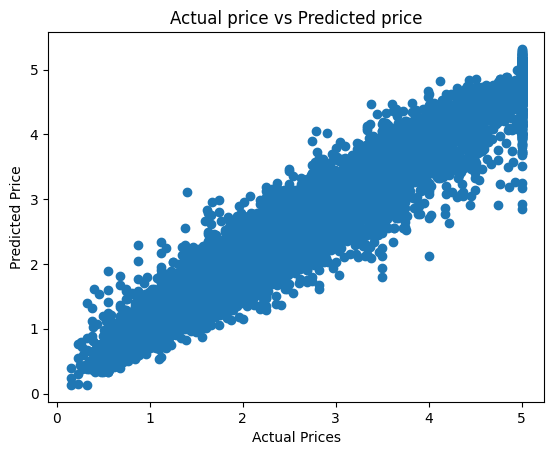

In [37]:
#visualize the actual prices and the predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show

In [34]:
#prediction on test data
#accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [36]:
# R squared error 
score_1 = metrics.r2_score(Y_test, test_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print("Mean absolute error:", score_2)

R squared error :  0.8338000331788725
Mean absolute error: 0.3108631800268186
